# Boston House Prices

In [34]:
# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
# Import the dataset
# Data source: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data?select=housing.csv
df = pd.read_csv("housing.csv")

In [6]:
# Preview the first 5 rows
df.head(5)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


There are no named columns in the dataset, but from the source we know that the columns should be:

1. `CRIM`: per capita crime rate by town
2. `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
3. `INDUS`: proportion of non-retail business acres per town
4. `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. `NOX`: nitric oxides concentration (parts per 10 million)
6. `RM`: average number of rooms per dwelling
7. `AGE`: proportion of owner-occupied units built prior to 1940
8. `DIS`: weighted distances to ﬁve Boston employment centers
9. `RAD`: index of accessibility to radial highways
10. `TAX`: full-value property-tax rate per 10,000
11. `PTRATIO`: pupil-teacher ratio by town 
12. `B`: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
13. `LSTAT`: % lower status of the population
14. `MEDV`: Median value of owner-occupied homes in $1000s

In [24]:
# Update the DataFrame and add column names
column_names = ["Crime_Rate", "Residential_Land_Zone", "Non_Retail_Acres", "Charles_River", "Nitric_Oxide_Concentration", "Rooms", "Age", "Employment_Center_Distance", 
                "Radial_Highway_Accessibility", "Property_Tax", "Teacher_Ratio", "B", "Lower_Population", "Median_Price"]
df = pd.read_csv("housing.csv", delim_whitespace=True, names=column_names)

In [25]:
# Preview the first 5 rows
df.head(5)

,Crime_Rate,Residential_Land_Zone,Non_Retail_Acres,Charles_River,Nitric_Oxide_Concentration,Rooms,Age,Employment_Center_Distance,Radial_Highway_Accessibility,Property_Tax,Teacher_Ratio,B,Lower_Population,Median_Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
# Get info on the Dataframe and ensure there are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crime_Rate                    506 non-null    float64
 1   Residential_Land_Zone         506 non-null    float64
 2   Non_Retail_Acres              506 non-null    float64
 3   Charles_River                 506 non-null    int64  
 4   Nitric_Oxide_Concentration    506 non-null    float64
 5   Rooms                         506 non-null    float64
 6   Age                           506 non-null    float64
 7   Employment_Center_Distance    506 non-null    float64
 8   Radial_Highway_Accessibility  506 non-null    int64  
 9   Property_Tax                  506 non-null    float64
 10  Teacher_Ratio                 506 non-null    float64
 11  B                             506 non-null    float64
 12  Lower_Population              506 non-null    float64
 13  Media

In [36]:
# Separate the target feature
X = df.drop(labels="Median_Price", axis=1) # Set axis=1 to specify we're dropping a column
Y = df["Median_Price"]

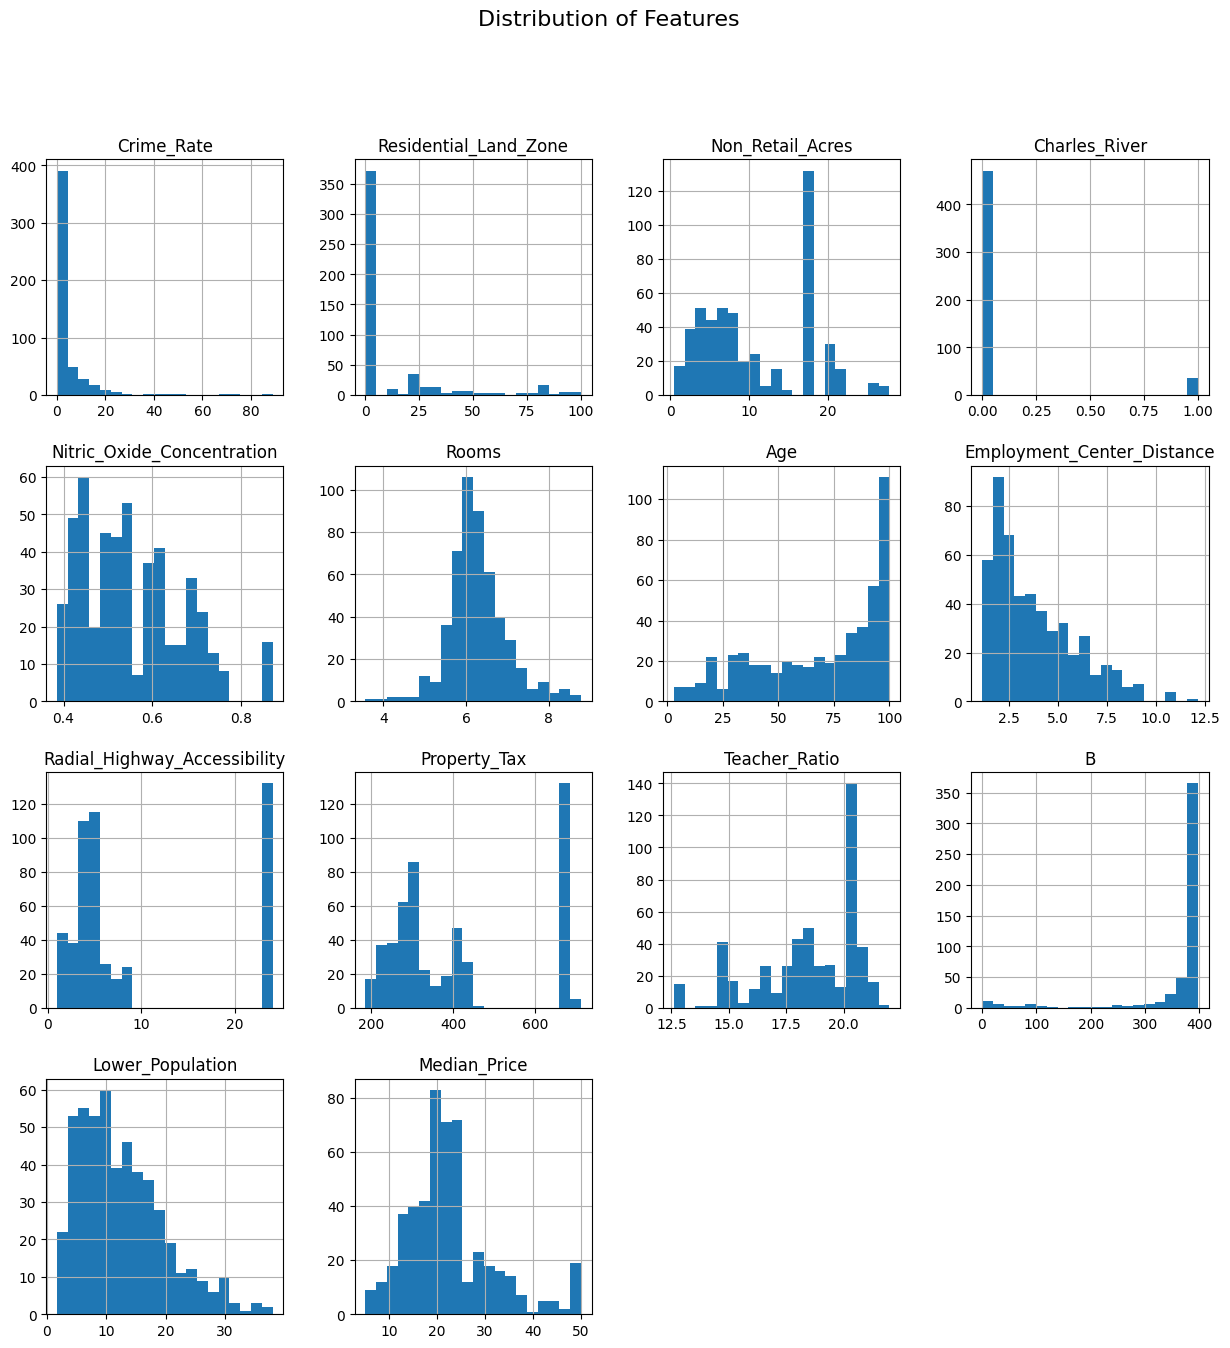

In [28]:
# Create some histogram plots to get an idea of the distribution for each feature

# Plot histograms for each feature
df.hist(figsize=(15, 15), bins=20)
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

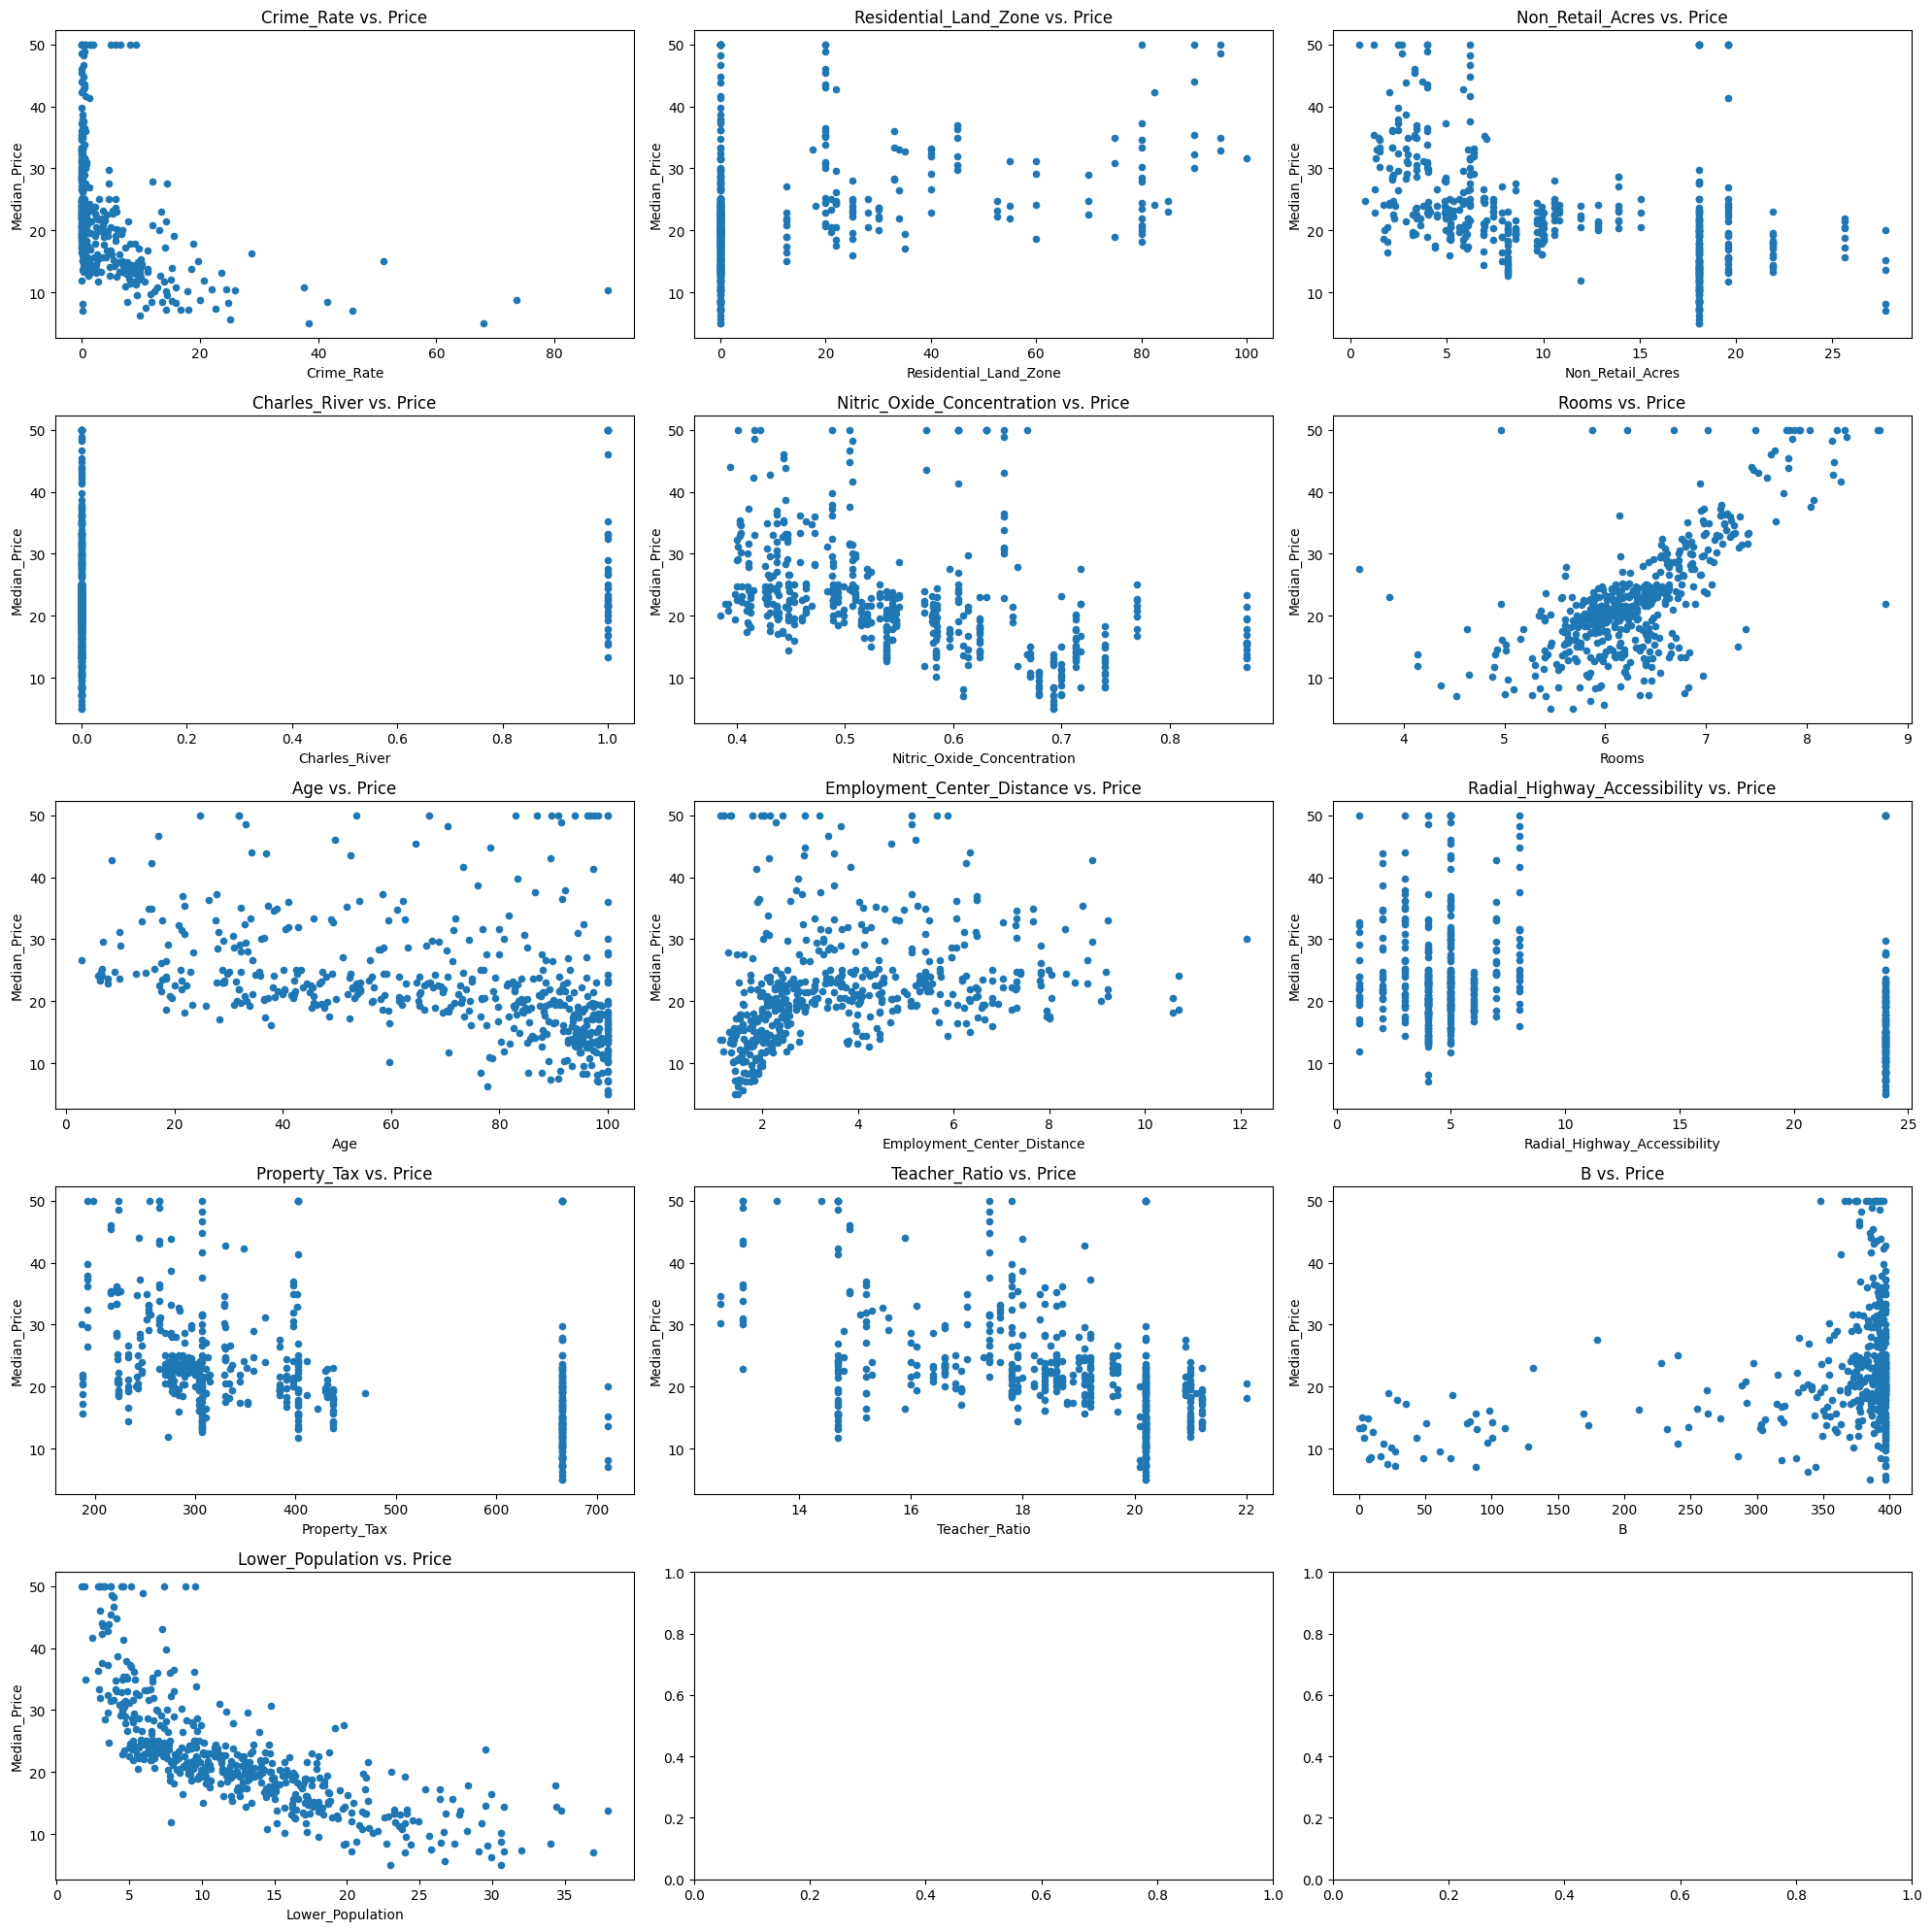

In [33]:
# Create sub-plots to get an idea of how each feature affects the price

# This creates a grid of subplots arranged in a 5x4 grid (5 rows and 4 columns) within a single figure.
# axes is an array where each element corresponds to a subplot's position in the grid. Ex: axes[0, 0] represents the subplot at the top-left corner
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

# Plot each feature against the price
for i, column in enumerate(df.columns):
    if column != "Median_Price":
        df.plot(kind="scatter", x=column, y="Median_Price", ax=axes[i])
        axes[i].set_title(f'{column} vs. Price')

# Adjust layout and show plots
plt.tight_layout()
plt.show()



In [72]:
# Split features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression()

# fit calculates the optimal values for the weights of the linear regression model. This involves solving the linear regression equation to find the values that minimize the mean squared error between the predicted values and the actual target values.
model.fit(X_train, y_train)

LinearRegression()

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Have the model make predictions using the test dataset  
y_pred = model.predict(X_test)

# Evaluate the predictions vs the real values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 3.8429092204445
Mean Squared Error: 33.448979997676375


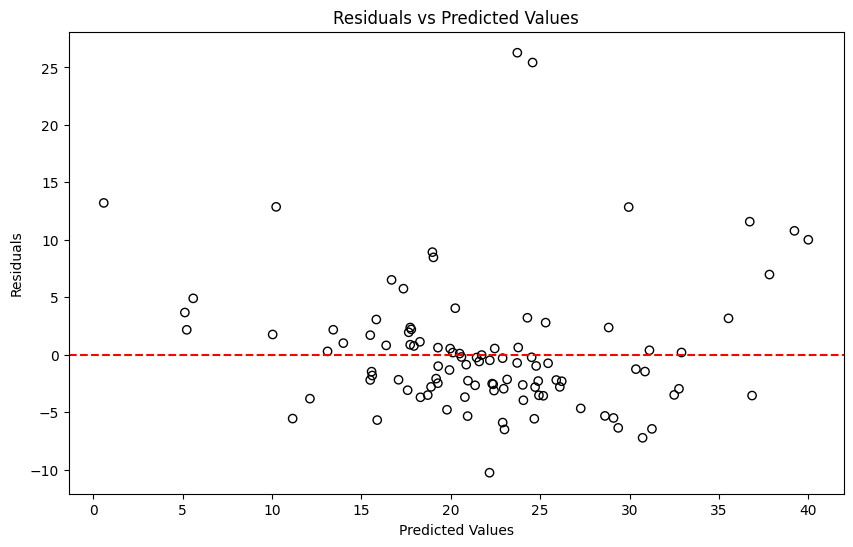

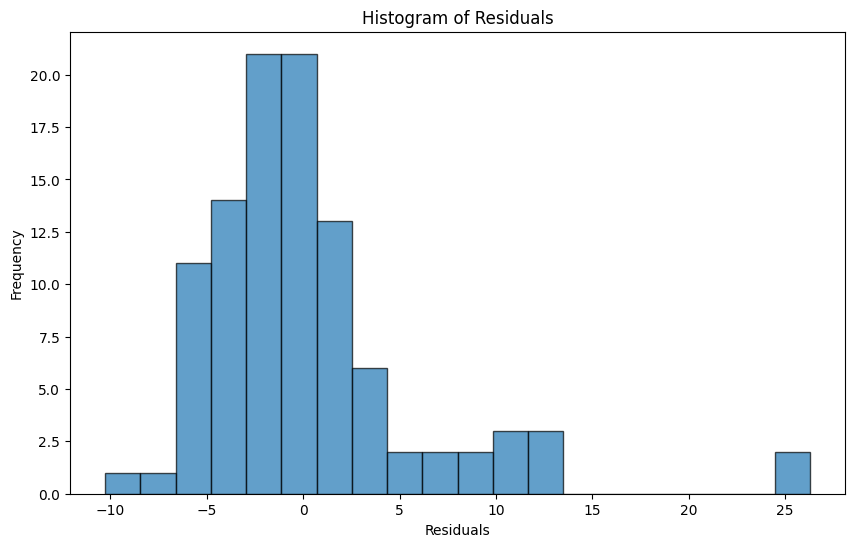

In [69]:
residuals = y_test - y_pred

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', facecolor='none')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

The residual plot shows some big differences between the predicted values and the actual values. We will try to normalize 
the data to see if this helps improve the model performance

In [74]:
# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the model
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [76]:
# Making predictions
y_pred2 = model_scaled.predict(X_test_scaled)
residuals = y_test - y_pred2

# Calculate performance metrics
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)

print(f"Mean Absolute Error: {mae2}")
print(f"Mean Squared Error: {mse2}")

Mean Absolute Error: 3.8429092204444943
Mean Squared Error: 33.44897999767649


In [78]:
mae_diff = abs(mae - mae2)
mse_diff = abs(mse - mse2)

print(f"MAE Diff: {mae_diff}")
print(f"MSE Diff: {mse_diff}")

MAE Diff: 5.773159728050814e-15
MSE Diff: 1.1368683772161603e-13
